In [132]:
import pandas as pd
import operator


In [135]:
path_vcf_res = '../../data/geno/vcf.csv'
skiprows = 8
pheno = 'GrainWeight'
pheno = 'Heading'
path_pheno = '../../data/phenotypes/' + pheno + '.csv'
path_pheno

'../../data/phenotypes/Heading.csv'

In [ ]:
df_geno = pd.read_csv(path_vcf_res, sep='\t')

In [ ]:
total_count = len(df_geno.index)
print(total_count)
df_geno.head(4)

In [81]:
df_pheno = pd.read_csv(path_pheno,sep=',')

In [82]:
total_count_pheno = len(df_pheno.index)
print(total_count_pheno)
df_pheno.head(4)

3404


,Env,LotName,Heading
0,WS2-MTA,WW-456,90.0
1,WS2-MTA,WW-028,99.0
2,WS2-MTA,WW-449,97.0
3,WS2-MTA,WW-1002,87.0


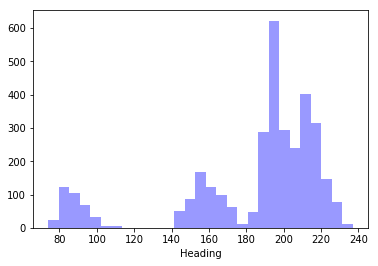

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_pheno[pheno], kde=False, color="b")


In [116]:
df_geno_ = df_geno.head(122187)

In [126]:
res = {}
for k,v in df_geno.iterrows():
    zeros = list(v[v == 0].index)
    ones = list(v[v == 1].index)
    df_zeros = df_pheno[df_pheno['LotName'].isin(zeros)]
    df_ones = df_pheno[df_pheno['LotName'].isin(ones)]
    zeros_mean = df_zeros[pheno].mean()
    ones_mean = df_ones[pheno].mean()
    diff = abs(zeros_mean - ones_mean)
    res[v['ID']] = diff

In [127]:
sorted_x = sorted(res.items(), key=operator.itemgetter(1))


In [128]:
sorted_x[-10:]

[('WTa_01b530', 16.520854489909993),
 ('WTa_027a8b', 16.71478137220052),
 ('WTa_083319', 16.84528508698196),
 ('WTa_037afe', 16.95729858851277),
 ('WTa_054248', 17.052041357819775),
 ('WTa_072c75', 17.059823200432987),
 ('WTa_037b20', 17.409341178942952),
 ('WTa_06ec12', 17.509841388202773),
 ('WTa_0ac768', 17.77157165988268),
 ('WTa_053b48', 17.952841124217258)]

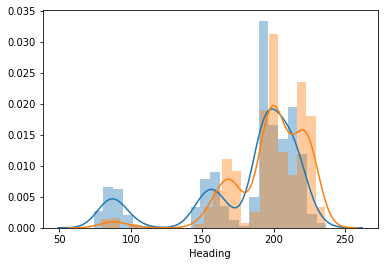

In [129]:
df_marker = df_geno[df_geno['ID']=='WTa_01b530']
markers = df_marker.iloc[0]
zeros = list(markers[markers == 0].index)
ones = list(markers[markers == 1].index)
df_zeros = df_pheno[df_pheno['LotName'].isin(zeros)]
df_ones = df_pheno[df_pheno['LotName'].isin(ones)]
sns.distplot(df_zeros[pheno])
sns.distplot(df_ones[pheno])

In [130]:
df_zeros[pheno].mean()

181.1138652207591

In [131]:
df_ones[pheno].mean()

197.6347197106691